# Classification algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [2]:
from sklearn.datasets import load_iris
df = load_iris()

In [7]:
df_iris = pd.DataFrame(df['data'],columns=['sepal length','sepal width','petal length','petal width'])
display(df_iris.head())

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df_target = pd.DataFrame(df['target'],columns=['target'])
display(df_target.head())

,target
0,0
1,0
2,0
3,0
4,0


In [18]:
df_target['target'].unique()

array([0, 1, 2])

In [4]:
X = pd.DataFrame(df['data'],columns=['sepal lemgth','sepalwidth','petal lenghth','petal width'])
y = pd.DataFrame(df['target'],columns=['target'])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size = 0.3,random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
treeClf=DecisionTreeClassifier()

In [21]:
treeClf.fit(X_train,Y_train)

DecisionTreeClassifier()

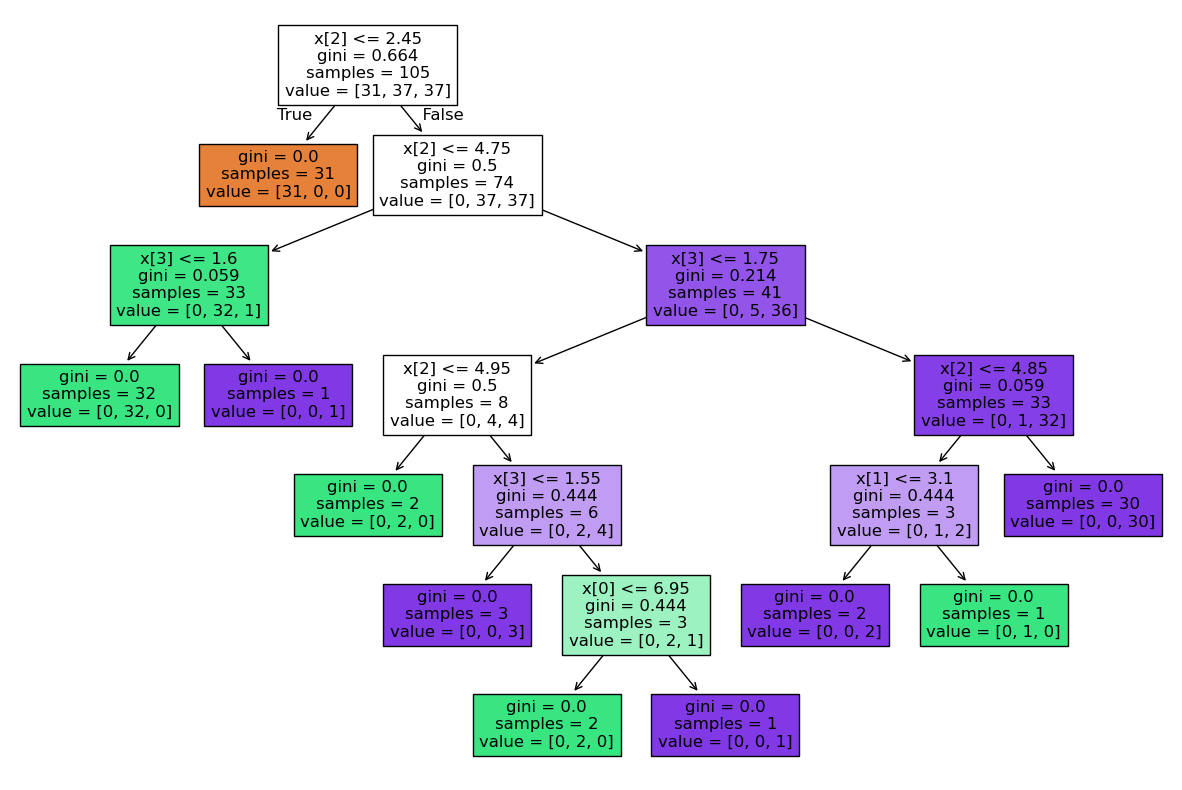

In [23]:
from sklearn import tree
pl.figure(figsize=(15,10))
tree.plot_tree(treeClf,filled=True)
pl.show()

In [24]:
Y_pred = treeClf.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix = \n', confusion_matrix(Y_test,Y_pred))
print('Classification report: \n', classification_report(Y_test,Y_pred))

Confusion matrix = 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [26]:
k = input('Enter the sepal length: ')
l = input('Enter the sepal width: ')
m = input('Enter the petal length: ')
n = input('Enter the petal width: ')
predicteditem = treeClf.predict([[k,l,m,n]])
print(predicteditem)

Enter the sepal length: 4
Enter the sepal width: 6
Enter the petal length: 1
Enter the petal width: 7
[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


##  Play Tennis example using Decision Trees

In [28]:
df_tennis = pd.read_csv("play_tennis.csv")

In [29]:
df_tennis.head()

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,85,85,Weak,No
1,D2,Sunny,80,90,Strong,Yes
2,D3,Overcast,83,78,Weak,Yes
3,D4,Rain,70,96,Weak,Yes
4,D5,Rain,68,80,Weak,No


For the attributes Outlook and Wind, and the ouput PlayTennis, replace the categorical
values by numerical ones as follows:



*   Outlook: {Sunny, Overcast, Rain} -> {0,1,2}
*  Wind: {Weak, Strong} -> {0,1}
* PlayTennis: {Yes, No} -> {1,0}

In [30]:
df_tennis['Outlook'].replace(['Sunny','Overcast','Rain'], [0,1,2], inplace=True)
df_tennis['Wind'].replace(['Weak','Strong'], [0,1], inplace=True)
df_tennis['PlayTennis'].replace(['No','Yes'], [0,1], inplace=True)

/tmp/ipython-input-1526932913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tennis['Outlook'].replace(['Sunny','Overcast','Rain'], [0,1,2], inplace=True)
/tmp/ipython-input-1526932913.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tennis['Outlook'].replace(['Sunny','Overcast','Rain'

In [31]:
df_tennis.head()

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,0,85,85,0,0
1,D2,0,80,90,1,1
2,D3,1,83,78,0,1
3,D4,2,70,96,0,1
4,D5,2,68,80,0,0


In [33]:
X = df_tennis.iloc[:, 1:-1].values
y = df_tennis.iloc[:, -1].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

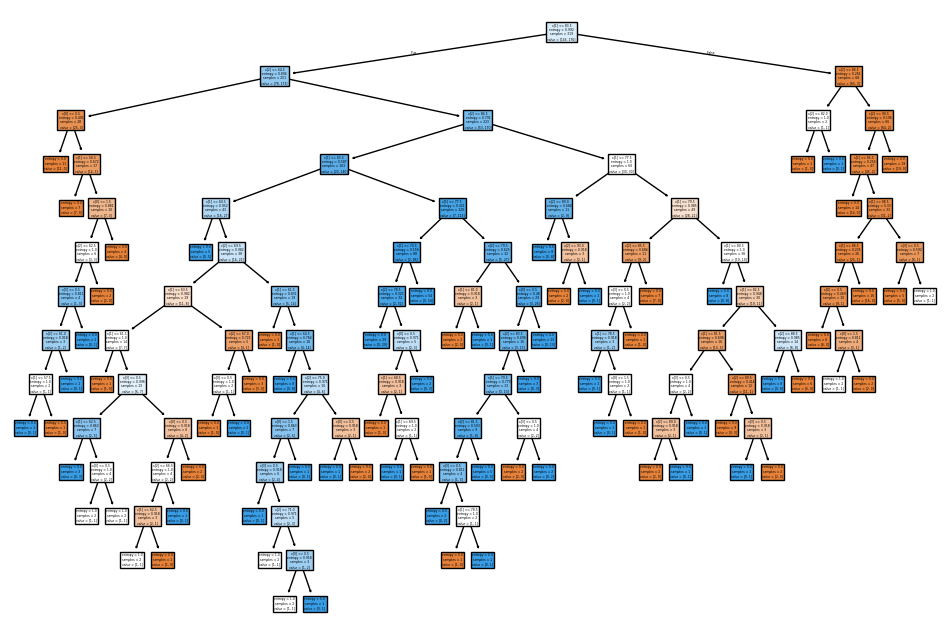

In [36]:
pl.figure(figsize=(12,8))
plot_tree(clf, filled=True)
pl.show()


In [37]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25  4]
 [ 4 47]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.92      0.92      0.92        51

    accuracy                           0.90        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [39]:
new_data = np.array([[1, 85, 85, 0]])  # Example
print(clf.predict(new_data))

[0]


## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[22  7]
 [ 6 45]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.87      0.88      0.87        51

    accuracy                           0.84        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[22  7]
 [ 1 50]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85        29
           1       0.88      0.98      0.93        51

    accuracy                           0.90        80
   macro avg       0.92      0.87      0.89        80
weighted avg       0.91      0.90      0.90        80

